In [1]:
%matplotlib inline

import torch

from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import time

In [11]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 3, padding=1)
        #self.conv2 = nn.Conv2d(10, 10, 3, padding=1)
        self.fc1 = nn.Linear(14*14*10, 20)
        self.fc2 = nn.Linear(20, 10)
    
    def forward(self, x):
        #x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = x.view(-1, 14*14*10)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model2 = torch.load('MNISTModel/model1.pt')
model1 = Model1()

In [8]:
BATCH_SIZE = 4

# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
trainset = torchvision.datasets.MNIST('./mnist',
                train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

train_size = len(trainset)

testset = torchvision.datasets.MNIST('./mnist',
               train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_size = len(testset)

def sample_result(model) :
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    
    output = model(images)
    _, pred = torch.max(output, 1)
    
    print('Labels: ', labels.numpy())
    print('Predic: ', pred.numpy())
    ##print('Batch shape: ', images.size())
    im = torchvision.utils.make_grid(images)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [36]:
def compute_accuracy(model):
    total = correct = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, pred = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (labels == pred).sum().item()
            #print(correct)
            
    return 100 * correct / total

In [37]:
print(compute_accuracy(model2))

97.4


Labels:  [4 7 4 0]
Predic:  [4 7 4 0]


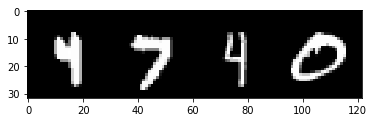

In [39]:
sample_result(model2)